In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [6]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2) # 2 features for visualization
X

array([[-10.31545867,  -0.64691481],
       [ -6.9000989 ,   8.32975011],
       [-10.33128505,   3.48988251],
       ...,
       [ -9.70901329,   1.73985081],
       [ -9.22672488,  10.39432568],
       [ -8.38095182,   7.4956115 ]])

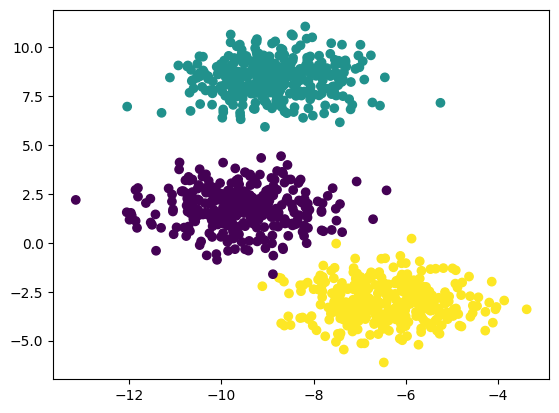

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [8]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.cluster import KMeans
model = KMeans()

# Elbow method to select the value of K
wcss = []
for k in range(1, 11):
  model = KMeans(n_clusters=k, init="k-means++")
  model.fit(X_train_scaled)
  wcss.append(model.inertia_) # The values of wcss for k values will be stored in 'inertia_' property

wcss

[1340.000000000001,
 492.9467591198183,
 250.3622539760737,
 195.3120642345417,
 156.4758319045185,
 109.11149151664668,
 94.93534290254016,
 83.06468249497289,
 70.09131964226937,
 64.87478596203444]

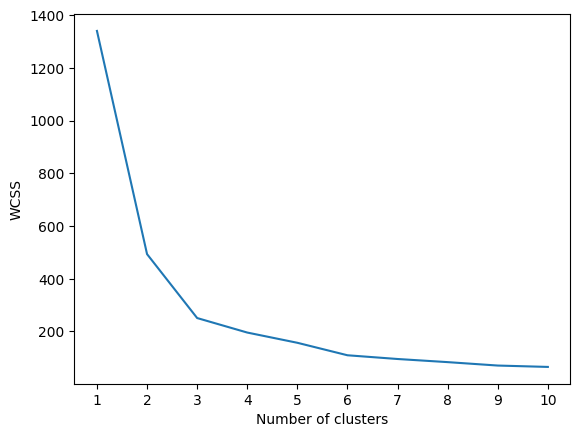

In [13]:
# Plotting elbow curve
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [18]:
model = KMeans(n_clusters=3, init="k-means++")
model.fit_predict(X_train_scaled)

array([1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 0, 0, 2, 1, 1, 0,
       2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 1, 1,
       0, 0, 2, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 2, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 0, 1, 2, 2,
       0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2, 2, 2, 1, 1,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       2, 2, 1, 2, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 0, 0, 2, 2, 2, 1,
       1, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 1, 0, 0, 1, 2, 0,
       1, 0, 1, 0, 2, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0, 1,
       2, 0, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2,
       2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1,

In [19]:
y_pred = model.predict(X_test_scaled)
y_pred

array([1, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2,
       2, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2,
       2, 2, 1, 2, 1, 1, 2, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 1,
       2, 1, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 0, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0,
       1, 0, 2, 2, 2, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       1, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1, 1, 2, 0, 2, 1, 0, 2, 2,
       0, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1,
       0, 1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2,
       1, 1, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 2, 0, 1,
       1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 0,
       0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 2, 2,

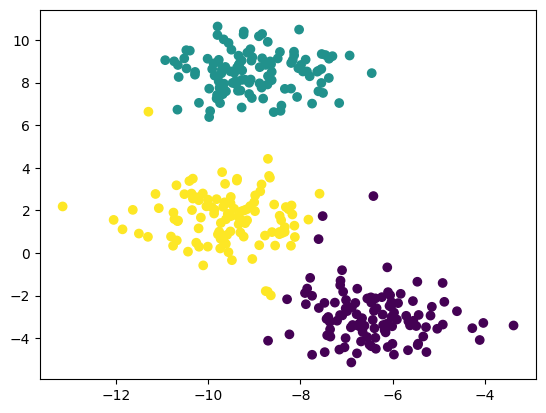

In [20]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)

In [ ]:
# Validation of k value using 'knee locator' and "silhoutee scoring"

# knee locator
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

3

In [22]:
# Silhoutte scoring
from sklearn.metrics import silhouette_score
silhouette_coeff = []
for k in range(2, 11):
  model = KMeans(n_clusters=k, init="k-means++")
  model.fit(X_train_scaled)
  score = silhouette_score(X_train_scaled, model.labels_)
  silhouette_coeff.append(score)

silhouette_coeff

[0.5703073868768377,
 0.5825287172588598,
 0.5146456028392251,
 0.48374848931899006,
 0.4531705911817444,
 0.4348701247276126,
 0.42262650510304023,
 0.4090386245279813,
 0.3918686230409278]

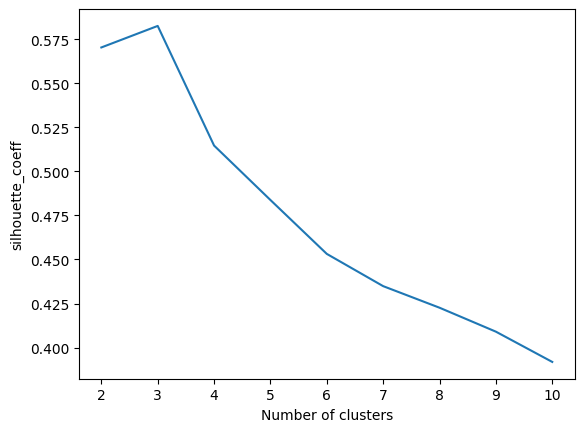

In [23]:
# Plotting elbow curve
plt.plot(range(2, 11), silhouette_coeff)
plt.xticks(range(2, 11))
plt.xlabel("Number of clusters")
plt.ylabel("silhouette_coeff")
plt.show()